- PyTorch provides two data primitives:
    - `torch.utils.data.Dataset`: stores the samples and their corresponding labels
    - `torch.utils.data.DataLoader`: wraps an iterable around the Dataset to enable easy access to the samples.
- Load FashionMNIST as an example 

In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
print("Initialize successfully")

Initialize successfully


In [3]:
training_data = datasets.FashionMNIST(
    root = "data",   # path to storage the data
    train = True, # True means this is training data, false means this is test data
    download = True, #True means if dataset is not available offline, then download it
    transform = ToTensor() # transform picture to tensor
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)
print(len(training_data),training_data[5])

60000 (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0863, 0.3451, 0.7373, 0.6745, 0.5176, 0.4902, 0.5529,
          0.7804, 0.5608, 0.0353, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0784, 0.5137,
          0.7804, 0.8078, 0.7686, 0.7922, 0.9490, 1.0000, 1.0000, 0.9804,
          0.8706, 0.7725, 0.8078, 0.7373, 0.4941, 0.0667, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.1373, 0.8392, 0.7490,
          0.7176, 0.6980, 0.6863, 0.6588, 0.5882, 0.6353, 0.6235, 0.5961,
          0.6196, 0.7020, 0.7176, 0.7412, 0.7647, 0.7255, 0.3216, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6667, 0.7451, 0.6745,
          0.6941, 0.6902, 0.6706, 0.6627, 0.6353, 0.6078, 0.5804, 0.6039,
          0.6627, 0.6824, 0.6863, 0.6863, 0.6941, 

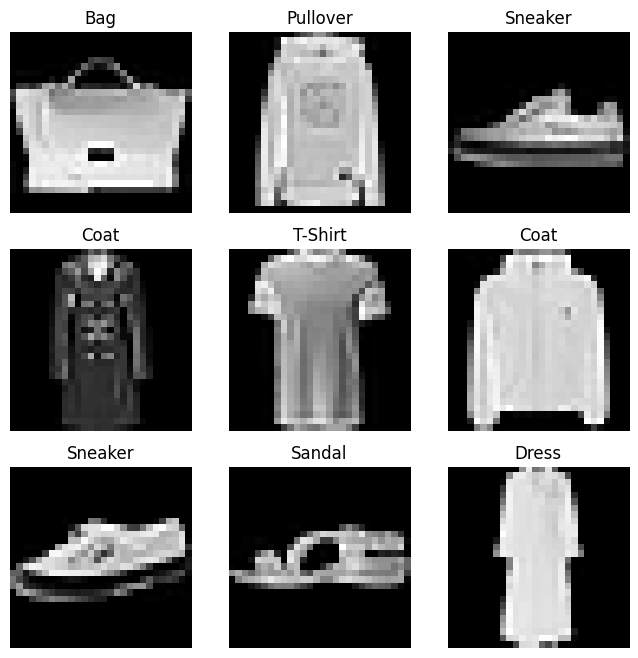

In [4]:
# scratch out some samples
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # randomly choose some pictures
    img, label = training_data[sample_idx] # indexing Dataset like indexing list, return a tuple (img_tensor, label)
    # graph some examples
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") # squeeze() remove all the dimensions with size 1 in tensor
plt.show()

### DataLoader
- pass samples in minibatches
- reshuffle data to reduce overfitting
- use `multiprocessing` to speed up data retrieval

In [6]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
print(train_dataloader)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
tensor([5, 0, 3, 6, 6, 6, 8, 7, 0, 8, 7, 9, 0, 7, 5, 7, 2, 9, 0, 1, 4, 9, 7, 7,
        9, 9, 9, 2, 2, 3, 9, 6, 8, 3, 4, 3, 6, 4, 7, 8, 6, 7, 3, 2, 4, 6, 3, 4,
        6, 9, 7, 1, 9, 2, 4, 7, 1, 7, 4, 0, 1, 2, 6, 3])


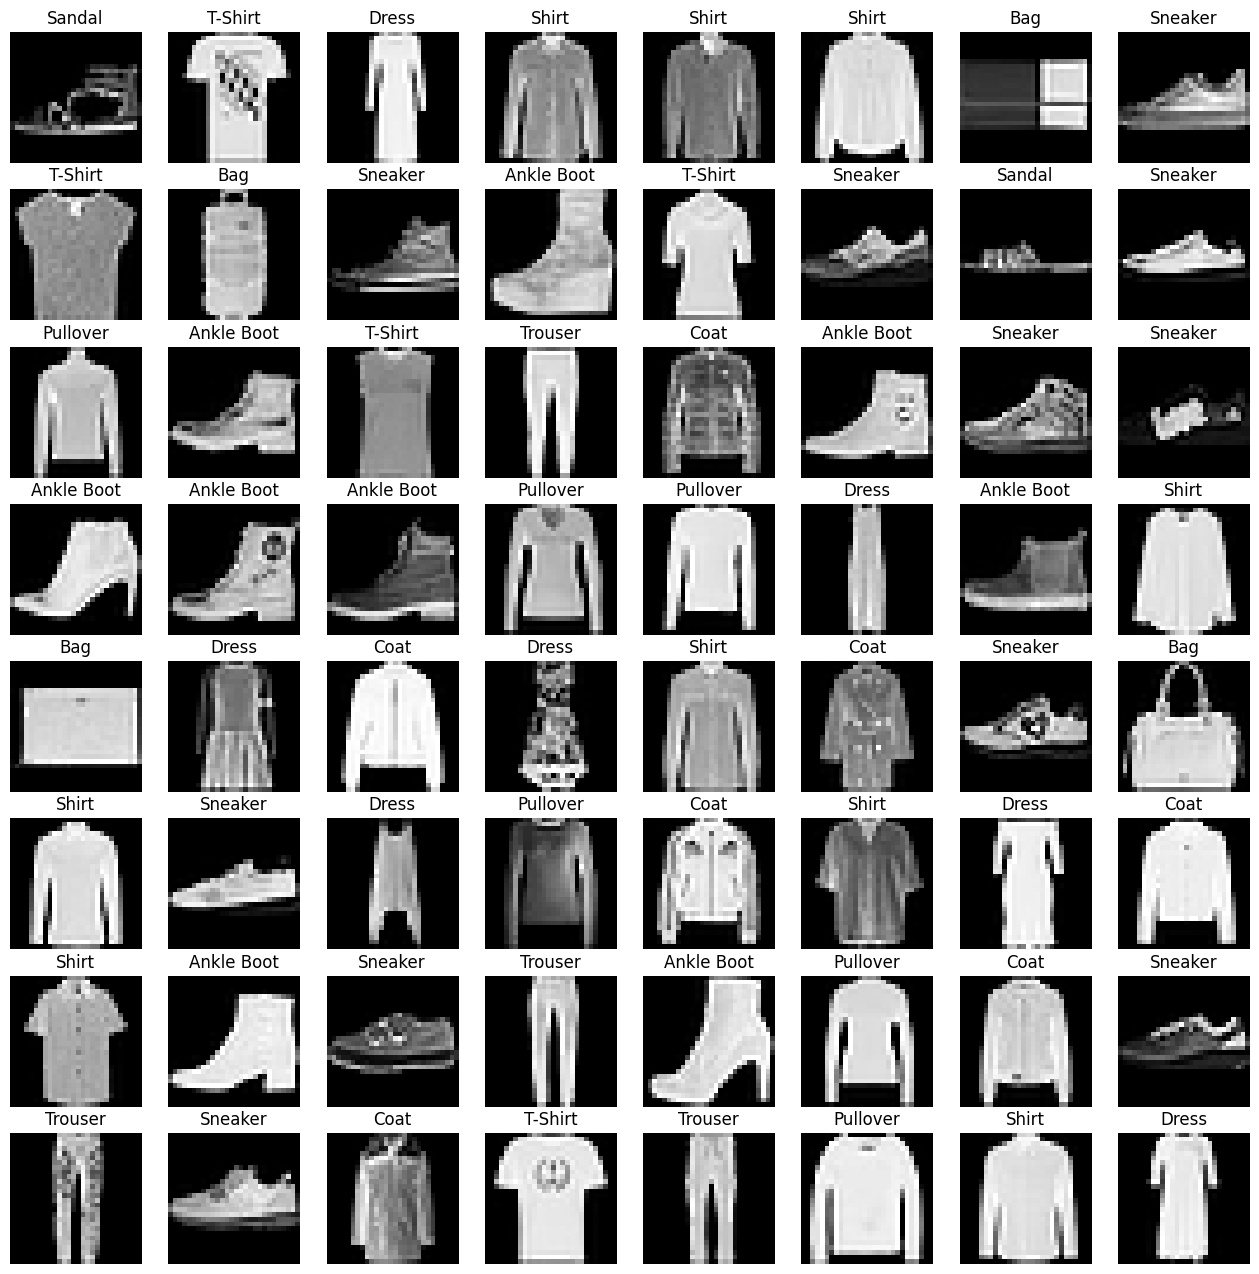

In [10]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_labels) # tensors

figure = plt.figure(figsize=(16,16))
col,row = 8, 8
for i in range(col*row):
    img = train_features[i].squeeze()
    label = train_labels[i]
    figure.add_subplot(row, col, i+1)
    plt.title(labels_map[label.item()])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()
    